In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cv2
from google.colab.patches import cv2_imshow
from os import listdir
from os.path import isfile, join

# import data and create dataframe

In [ ]:
!git clone https://github.com/seensiravit/Parkinson-Early-Detection.git

Cloning into 'Parkinson-Early-Detection'...
remote: Enumerating objects: 273, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 273 (delta 3), reused 16 (delta 1), pack-reused 253
Receiving objects: 100% (273/273), 60.80 MiB | 31.30 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [29]:
PD_data_path = '/content/Parkinson-Early-Detection/dataset/HandPD/spiral/HealthySpiral'
H_data_path = '/content/Parkinson-Early-Detection/dataset/HandPD/spiral/HealthySpiral'

In [47]:
H_img = [H_data_path+'/'+f for f in listdir(H_data_path)]
PD_img = [PD_data_path+'/'+f for f in listdir(PD_data_path)]

In [48]:
print(H_img[:5])
print(PD_img[:5])

['/content/Parkinson-Early-Detection/dataset/HandPD/spiral/HealthySpiral/sp4-H17.jpg', '/content/Parkinson-Early-Detection/dataset/HandPD/spiral/HealthySpiral/sp1-H13.jpg', '/content/Parkinson-Early-Detection/dataset/HandPD/spiral/HealthySpiral/sp2-H20.jpg', '/content/Parkinson-Early-Detection/dataset/HandPD/spiral/HealthySpiral/sp4-H16.jpg', '/content/Parkinson-Early-Detection/dataset/HandPD/spiral/HealthySpiral/sp2-H14.jpg']
['/content/Parkinson-Early-Detection/dataset/HandPD/spiral/PatientSpiral/sp1-P2.jpg', '/content/Parkinson-Early-Detection/dataset/HandPD/spiral/PatientSpiral/sp2-P30.jpg', '/content/Parkinson-Early-Detection/dataset/HandPD/spiral/PatientSpiral/sp1-P16.jpg', '/content/Parkinson-Early-Detection/dataset/HandPD/spiral/PatientSpiral/sp1-P3.jpg', '/content/Parkinson-Early-Detection/dataset/HandPD/spiral/PatientSpiral/sp2-P3.jpg']


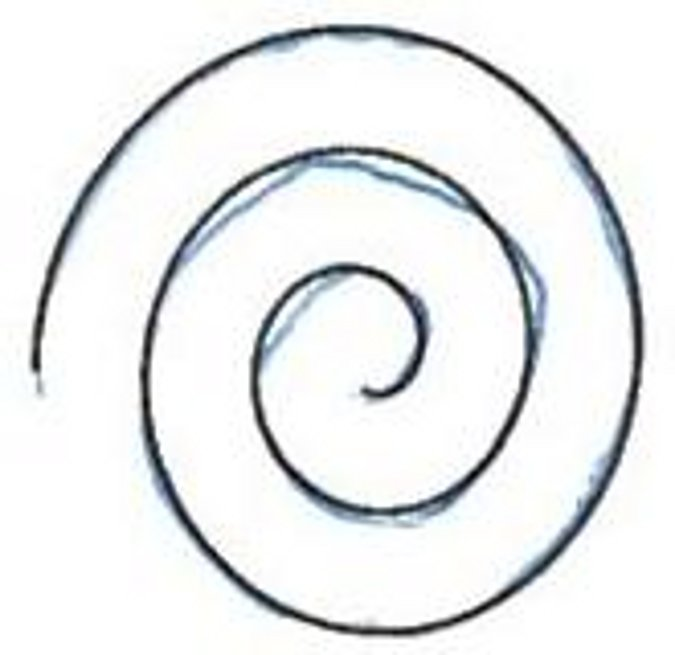

In [51]:
image = cv2.imread(H_img[0] , 1)
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [86]:
df_img = pd.concat([pd.DataFrame({'PNG':path , 'PD':0} for path in H_img) , pd.DataFrame({'PNG':path , 'PD':1} for path in PD_img)] , ignore_index=True)
df_img

,PNG,PD
0,/content/Parkinson-Early-Detection/dataset/Han...,0
1,/content/Parkinson-Early-Detection/dataset/Han...,0
2,/content/Parkinson-Early-Detection/dataset/Han...,0
3,/content/Parkinson-Early-Detection/dataset/Han...,0
4,/content/Parkinson-Early-Detection/dataset/Han...,0
...,...,...
259,/content/Parkinson-Early-Detection/dataset/Han...,1
260,/content/Parkinson-Early-Detection/dataset/Han...,1
261,/content/Parkinson-Early-Detection/dataset/Han...,1
262,/content/Parkinson-Early-Detection/dataset/Han...,1


In [87]:
df_img = df_img.sample(frac = 1)
df_img = df_img.reset_index()
df_img

,index,PNG,PD
0,112,/content/Parkinson-Early-Detection/dataset/Han...,0
1,147,/content/Parkinson-Early-Detection/dataset/Han...,1
2,101,/content/Parkinson-Early-Detection/dataset/Han...,0
3,49,/content/Parkinson-Early-Detection/dataset/Han...,0
4,5,/content/Parkinson-Early-Detection/dataset/Han...,0
...,...,...,...
259,25,/content/Parkinson-Early-Detection/dataset/Han...,0
260,95,/content/Parkinson-Early-Detection/dataset/Han...,0
261,74,/content/Parkinson-Early-Detection/dataset/Han...,0
262,81,/content/Parkinson-Early-Detection/dataset/Han...,0


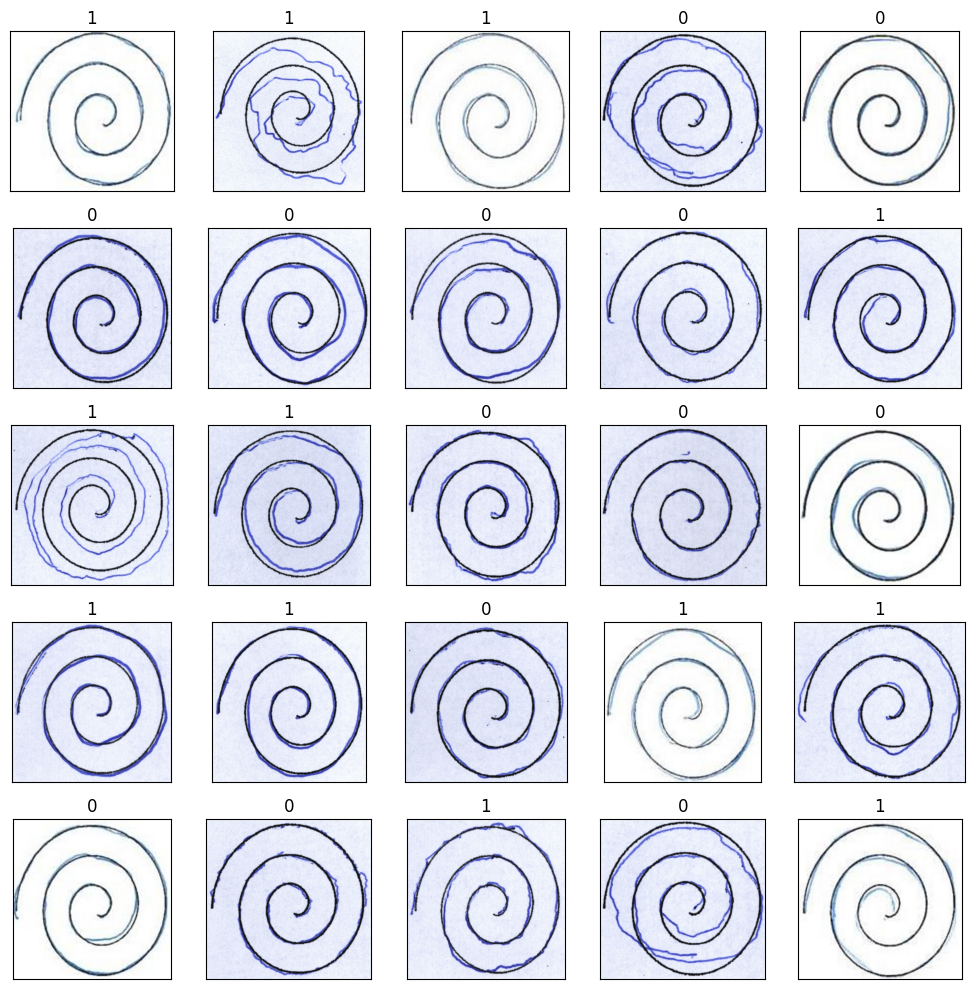

In [88]:
fig, axes = plt.subplots(nrows=5,
                        ncols=5,
                        figsize=(10,10),
                        subplot_kw={"xticks":[],"yticks":[]})

for i,ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df_img["PNG"][i]))
    ax.set_title(df["PD"][i])
plt.tight_layout()
plt.show()